In [4]:
# Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [ ]:
 # [Step 1] Load the processed datasets
PoliceKillingUS = pd.read_csv('../../datasets/PolliceKillingUS_Avg_2015_2016.csv', encoding='utf-8') # percentages combination of years 2015-2016
PoliceKillingUS.head()

,state,Avg Deaths,Avg Deaths in percentage
0,AK,5.5,0.565264
1,AL,21.0,2.155746
2,AR,10.0,1.031087
3,AZ,46.0,4.715126
4,CA,163.5,16.700931


In [6]:
PovertyUS = pd.read_csv('../../datasets/PovertyUS_Avg_2015_2016.csv', encoding='utf-8')
PovertyUS.head()

,ID,Name,Poverty Universe Avg,Number in Poverty Avg,Percent in Poverty Avg
0,1000,AL,4738864.5,845025.0,17.85
1,2000,AK,722359.5,73428.5,10.15
2,4000,AZ,6721407.0,1133099.5,16.90
3,5000,AR,2892994.5,519060.5,17.95
4,6000,CA,38455705.0,5711938.0,14.90


In [7]:
# [Step 2] Merge the datasets on 'state' and 'Name'
Joined = pd.merge(PoliceKillingUS, PovertyUS, left_on='state', right_on='Name', how='outer')
Joined.fillna(0, inplace=True)  # Replace missing values with 0
Joined.loc[Joined['state'] == 0, 'state'] = Joined.loc[Joined['state'] == 0, 'Name']  # Replace missing state names
Joined.to_csv('../Joined.csv', index=False)  # Save the joined dataset for reference
Joined.head()

,state,Avg Deaths,Avg Deaths in percentage,ID,Name,Poverty Universe Avg,Number in Poverty Avg,Percent in Poverty Avg
0,AK,5.5,0.565264,2000,AK,722359.5,73428.5,10.15
1,AL,21.0,2.155746,1000,AL,4738864.5,845025.0,17.85
2,AR,10.0,1.031087,5000,AR,2892994.5,519060.5,17.95
3,AZ,46.0,4.715126,4000,AZ,6721407.0,1133099.5,16.90
4,CA,163.5,16.700931,6000,CA,38455705.0,5711938.0,14.90


In [ ]:
Joined['Log Poverty'] = Joined['Percent in Poverty Avg'] # Average poverty rates 2015-2016
Joined['Log Killings'] = Joined['Avg Deaths in percentage'] # Average homicide rates 2015-20
Joined.head()

,state,Avg Deaths,Avg Deaths in percentage,ID,Name,Poverty Universe Avg,Number in Poverty Avg,Percent in Poverty Avg,Log Poverty,Log Killings
0,AK,5.5,0.565264,2000,AK,722359.5,73428.5,10.15,10.15,0.565264
1,AL,21.0,2.155746,1000,AL,4738864.5,845025.0,17.85,17.85,2.155746
2,AR,10.0,1.031087,5000,AR,2892994.5,519060.5,17.95,17.95,1.031087
3,AZ,46.0,4.715126,4000,AZ,6721407.0,1133099.5,16.90,16.90,4.715126
4,CA,163.5,16.700931,6000,CA,38455705.0,5711938.0,14.90,14.90,16.700931


In [9]:
# [Step 4] Select the features for clustering
X = Joined[['Log Poverty', 'Log Killings']]

In [10]:
# [Step 5] Normalize the data using z-score normalization
xV1 = zscore(X.iloc[:, 0])
xV2 = zscore(X.iloc[:, 1])
X = np.transpose(np.array([xV1, xV2]))
print(X)

[[-1.24170763e+00 -5.33929778e-01]
 [ 1.31260660e+00  7.45930353e-02]
 [ 1.34577952e+00 -3.55704777e-01]
 [ 9.97463938e-01  1.05381824e+00]
 [ 3.34005694e-01  5.63961905e+00]
 [-8.76805600e-01  4.25430281e-01]
 [-1.20853472e+00 -6.32132935e-01]
 [ 1.39553888e+00 -5.73660061e-01]
 [-5.61662934e-01 -6.72424494e-01]
 [ 4.66697343e-01  1.59993925e+00]
 [ 9.14531657e-01  3.26104573e-01]
 [-1.25829409e+00 -5.92402652e-01]
 [-6.61181671e-01 -5.54356195e-01]
 [ 1.18381765e-01 -4.95883321e-01]
 [-1.96760901e-01  1.71673642e-01]
 [ 1.01795309e-01 -1.05315791e-01]
 [-4.45557742e-01 -3.77815021e-01]
 [ 1.44529825e+00 -8.37668231e-02]
 [ 1.95947839e+00  1.48440848e-01]
 [-9.59737881e-01 -3.38084738e-01]
 [-1.35781283e+00 -1.62666115e-01]
 [-3.79211918e-01 -6.71863219e-01]
 [ 4.66697343e-01 -1.83092532e-01]
 [-1.27488055e+00 -2.40442855e-01]
 [ 1.68141133e-01  7.23479335e-02]
 [ 2.54000435e+00 -4.36849171e-01]
 [ 2.27657240e-03 -5.73660061e-01]
 [ 6.65734816e-01  3.49337367e-01]
 [-1.09242953e+00 -7

In [11]:
# [Step 6] Determine the number of clusters
numberOfRows, numberOfColumns = X.shape
k = int(input(f"Enter the number of clusters for K-means (from 2 to {numberOfRows}): "))
print(f"Number of clusters: {k}")

Number of clusters: 3


In [12]:
# [Step 7] Apply K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
IDX = kmeans.labels_  # Get the labels of each cluster
print(IDX)

[0 1 1 1 2 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 1 2 0 0 0 0 0 1 0]


In [13]:
C = kmeans.cluster_centers_  # Get the cluster centers
print(C)

[[-0.78281568 -0.38719263]
 [ 0.91754738  0.09291194]
 [ 0.47499057  4.20506917]]


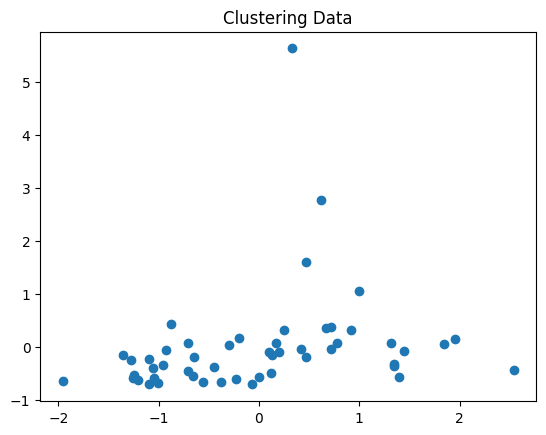

In [14]:
# [Step 8] Plotting the data points and clusters
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1])  # Plot all data without clustering
plt.title("Clustering Data")
plt.show()

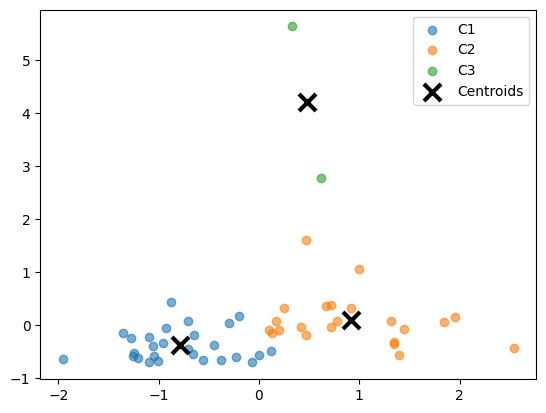

In [15]:
# [Step 9] Plot each cluster with different colors
colors = ['limegreen', 'yellow', 'c', 'purple']
for i in range(k):
    plt.scatter(X[IDX == i, 0], X[IDX == i, 1], label=f'C{i+1}', alpha=0.6)

# [Step 10] Plot the centroids
plt.scatter(C[:, 0], C[:, 1], marker='x', color='black', s=150, linewidth=3, label="Centroids", zorder=10)
plt.legend()
plt.show()

In [16]:
"""
    Draw the SSE Plot
"""
def plot_sse(max_clusters=10):
    # [Step 12.1] Calculate the SSE for different numbers of clusters
        sse = []
        for k in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
            kmeans.fit(X)
            sse.append(kmeans.inertia_)

        # [Step 12.2] Plot SSE vs. number of clusters to determine the optimal number of clusters (elbow method)
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, max_clusters + 1), sse, marker='o')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Sum of Squared Errors (SSE)')
        plt.title('Elbow Method For Optimal k')
        plt.show()

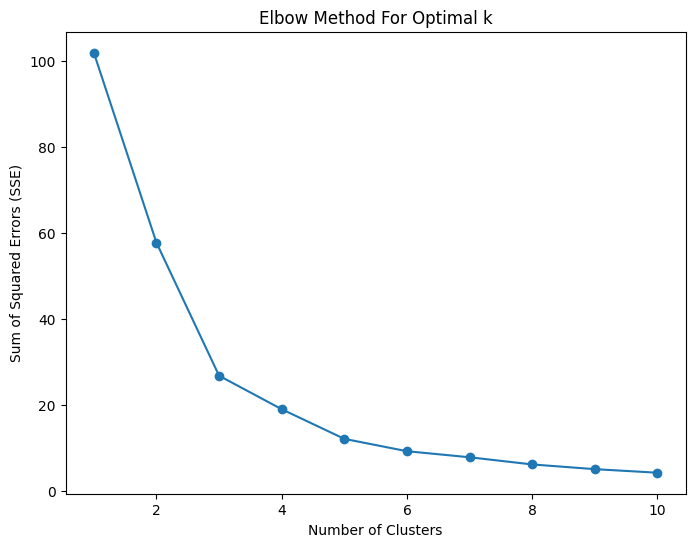

In [17]:
# [Step 12] Draw the SSE Plot
plot_sse(max_clusters=10)

In [18]:
# [Step 11] Print clustering metrics
print("\n\nSSE (Sum of Squared Errors) = %.3f" % kmeans.inertia_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, IDX))



SSE (Sum of Squared Errors) = 26.879
Silhouette Coefficient: 0.501
